# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [80]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [81]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [82]:
print(d["height"].mean())

154.5970926136364


## Task 1. Prior predictive checks

INFO:cmdstanpy:compiling stan file /home/height_1_ppc.stan to exe file /home/height_1_ppc
INFO:cmdstanpy:compiled model executable: /home/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


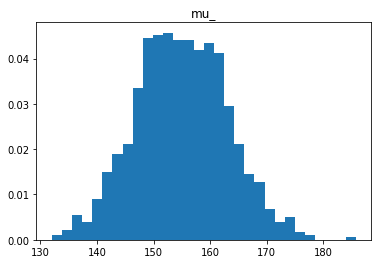

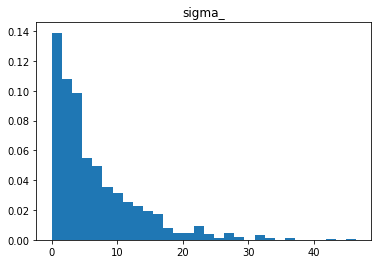

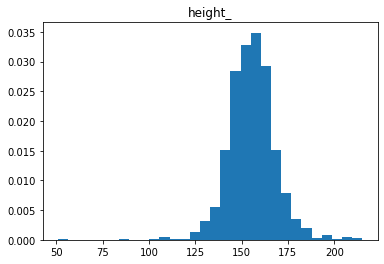

In [83]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(data=dict(N = len(d),heights=d.height),
                     iter_sampling=R,
                     chains=1,
                     seed=29042020,refresh=R)

mu_= sim.stan_variable("mu")
sigma_ = sim.stan_variable("sigma")
height_ = sim.stan_variable("height")
plt.hist(mu_, bins=30, density=True)
plt.title("mu_")
plt.show()
plt.hist(sigma_, bins=30, density=True)
plt.title("sigma_")
plt.show()
plt.hist(height_, bins=30, density=True)
plt.title("height_")
plt.show()

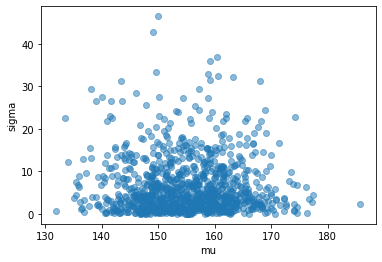

In [84]:
plt.scatter(mu_, sigma_, alpha=0.5)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()

(array([0.00400645, 0.00667742, 0.02136775, 0.02136775, 0.02938066,
        0.05341937, 0.03605808, 0.04407098, 0.04941292, 0.03739356,
        0.02938066, 0.05742583, 0.03205162, 0.01469033, 0.01469033,
        0.00934839, 0.00534194, 0.00267097, 0.        , 0.00133548]),
 array([136.525  , 138.65225, 140.7795 , 142.90675, 145.034  , 147.16125,
        149.2885 , 151.41575, 153.543  , 155.67025, 157.7975 , 159.92475,
        162.052  , 164.17925, 166.3065 , 168.43375, 170.561  , 172.68825,
        174.8155 , 176.94275, 179.07   ]),
 [<matplotlib.patches.Polygon at 0x7f66fd45d910>])

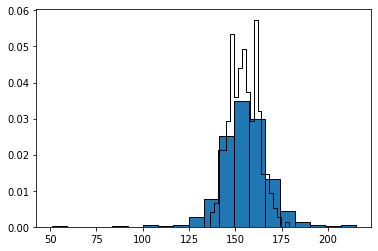

In [85]:
plt.hist(height_,bins=20,edgecolor='k',density=True)
plt.hist(d.height,bins=20,histtype='step',color='black',density=True)

## Task 2. Model fit and evaluation

In [95]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [97]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

mu_= fit.stan_variable("mu")
sigma_ = fit.stan_variable("sigma")
height_ = fit.stan_variable("height")

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


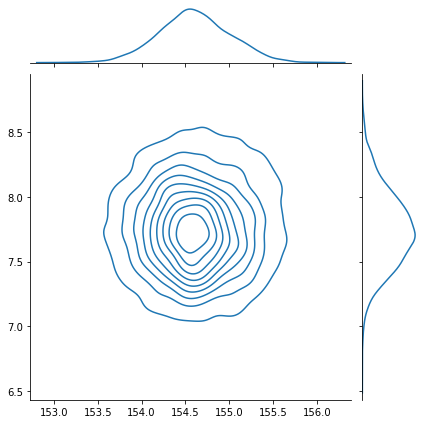

In [98]:
sns.jointplot(x=mu_,y=sigma_, kind='kde')

(array([0.00400645, 0.00667742, 0.02136775, 0.02136775, 0.02938066,
        0.05341937, 0.03605808, 0.04407098, 0.04941292, 0.03739356,
        0.02938066, 0.05742583, 0.03205162, 0.01469033, 0.01469033,
        0.00934839, 0.00534194, 0.00267097, 0.        , 0.00133548]),
 array([136.525  , 138.65225, 140.7795 , 142.90675, 145.034  , 147.16125,
        149.2885 , 151.41575, 153.543  , 155.67025, 157.7975 , 159.92475,
        162.052  , 164.17925, 166.3065 , 168.43375, 170.561  , 172.68825,
        174.8155 , 176.94275, 179.07   ]),
 [<matplotlib.patches.Polygon at 0x7f66ef059c40>])

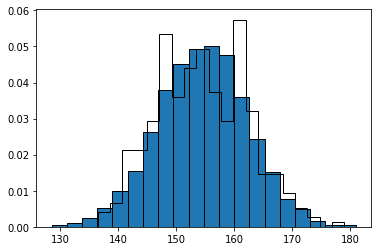

In [99]:
plt.hist(height_,bins=20,edgecolor='k',density=True)
plt.hist(d.height,bins=20,histtype='step',color='black',density=True)


1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [137]:
d['c_weight'] = d['weight'] / d['weight'].mean()
print(d['weight'].mean())
print(d['weight'])
print(np.linspace(d.c_weight.min(),d.c_weight.max()))
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


44.99048551988636
0      47.825606
1      36.485807
2      31.864838
3      53.041914
4      41.276872
         ...    
534    47.031821
537    34.246196
540    52.163080
541    54.062497
543    52.531624
Name: weight, Length: 352, dtype: float64
[0.69061384 0.70509379 0.71957374 0.73405369 0.74853364 0.76301359
 0.77749354 0.79197348 0.80645343 0.82093338 0.83541333 0.84989328
 0.86437323 0.87885318 0.89333313 0.90781308 0.92229303 0.93677297
 0.95125292 0.96573287 0.98021282 0.99469277 1.00917272 1.02365267
 1.03813262 1.05261257 1.06709252 1.08157247 1.09605241 1.11053236
 1.12501231 1.13949226 1.15397221 1.16845216 1.18293211 1.19741206
 1.21189201 1.22637196 1.24085191 1.25533185 1.2698118  1.28429175
 1.2987717  1.31325165 1.3277316  1.34221155 1.3566915  1.37117145
 1.3856514  1.40013134]


## Task 4. Prior predictive checks
 

In [143]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


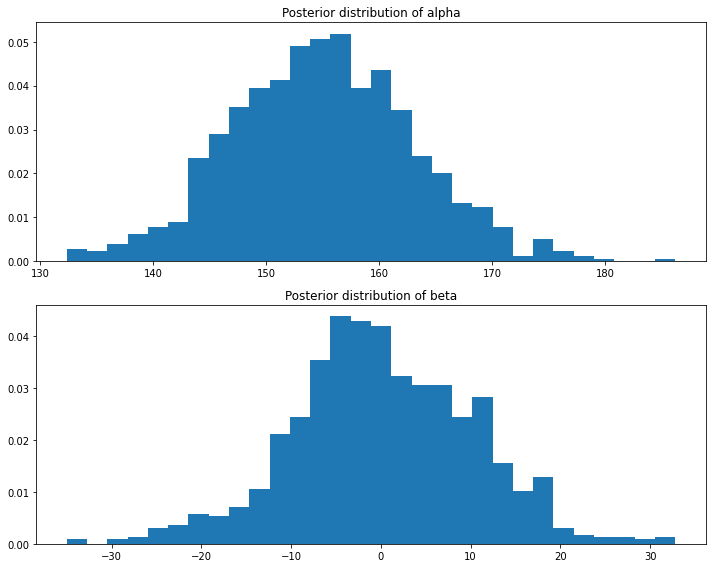

-3.04994
284.988


In [144]:
alfa_= sim.stan_variable("alpha")
bet_ = sim.stan_variable("beta")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].hist(alfa_, bins=30, density=True)
axes[0].set_title('Posterior distribution of alpha')
axes[1].hist(bet_, bins=30, density=True)
axes[1].set_title('Posterior distribution of beta')
plt.tight_layout()
plt.show()

height_= sim.stan_variable('height')

print(height_.min())
print(height_.max())

Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [169]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

height_= sim.stan_variable('height')
alfa_= sim.stan_variable("alpha")
bet_ = sim.stan_variable("beta")
tmp = sim.stan_variable('tmp')
sigma_ = sim.stan_variable('sigma')
print(tmp.min())
print(tmp.max())
print(height_.min())
print(height_.max())

INFO:cmdstanpy:compiling stan file /home/height_2b_ppc.stan to exe file /home/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/height_2b_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/height_2b_ppc.hpp /home/height_2b_ppc.stan
Warning in '/home/height_2b_ppc.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/height_2b_ppc.stan', line 10, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/height_2b_ppc.stan', line 11, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecate


INFO:cmdstanpy:CmdStan done processing.



133.326
187.054
110.521
201.344


In [152]:
print(height_.min())


4.79864
283.496


110.521
201.344


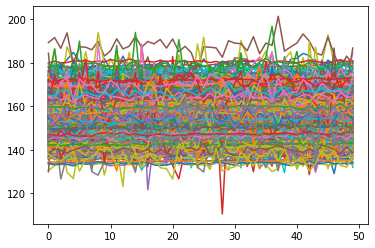

In [170]:
alfa_= sim.stan_variable("alpha")
bet_ = sim.stan_variable("beta")
height_= sim.stan_variable('height')


for i in range(len(alfa_)):
    plt.plot(height_[i])

print(height_.min())
print(height_.max())

1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

## Task 6. Fitting and evaluating model


In [223]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/height_2_fit.stan to exe file /home/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/height_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/height_2_fit.hpp /home/height_2_fit.stan
Warning in '/home/height_2_fit.stan', line 3, column 2: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/height_2_fit.stan', line 10, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/height_2_fit.stan', line 14, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and wi

In [224]:
print(data_sim)
N = 30
data_fit={'N':N, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max(), num=N)}
print(data_fit)


{'N': 50, 'weight': array([0.69061384, 0.70509379, 0.71957374, 0.73405369, 0.74853364,
       0.76301359, 0.77749354, 0.79197348, 0.80645343, 0.82093338,
       0.83541333, 0.84989328, 0.86437323, 0.87885318, 0.89333313,
       0.90781308, 0.92229303, 0.93677297, 0.95125292, 0.96573287,
       0.98021282, 0.99469277, 1.00917272, 1.02365267, 1.03813262,
       1.05261257, 1.06709252, 1.08157247, 1.09605241, 1.11053236,
       1.12501231, 1.13949226, 1.15397221, 1.16845216, 1.18293211,
       1.19741206, 1.21189201, 1.22637196, 1.24085191, 1.25533185,
       1.2698118 , 1.28429175, 1.2987717 , 1.31325165, 1.3277316 ,
       1.34221155, 1.3566915 , 1.37117145, 1.3856514 , 1.40013134])}
{'N': 30, 'weight': array([0.69061384, 0.71507996, 0.73954608, 0.7640122 , 0.78847832,
       0.81294444, 0.83741057, 0.86187669, 0.88634281, 0.91080893,
       0.93527505, 0.95974117, 0.98420729, 1.00867341, 1.03313953,
       1.05760565, 1.08207177, 1.10653789, 1.13100402, 1.15547014,
       1.17993626, 1

1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       


chain 4 |██████████| 00:01 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



182.937
108.202
205.37


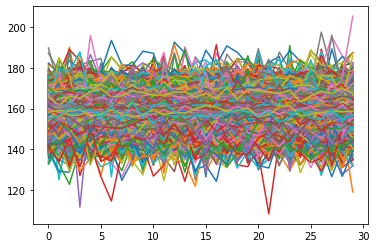

In [225]:
sim=model_2_fit.sample(data=data_fit, seed=28052020)
alfa_= sim.stan_variable("alpha")
bet_ = sim.stan_variable("beta")
height_ = sim.stan_variable("height")
tmp = sim.stan_variable("tmp")

for i in range(len(alfa_)):
    plt.plot(height_[i])

print(tmp.max())

print(height_.min())
print(height_.max())

2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 